# Heart disease

The occurance of heart disease is increasing annually. 13 attributes from different patients were collected to be analysed. The "goal" field refers to the presence of heart disease in the patient. 

Attribute Information:

age;
sex;
chest pain type (4 values);
resting blood pressure;
serum cholestoral in mg/dl;
fasting blood sugar > 120 mg/dl;
resting electrocardiographic results (values 0,1,2);
maximum heart rate achieved;
exercise induced angina;
oldpeak = ST depression induced by exercise relative to rest;
the slope of the peak exercise ST segment;
number of major vessels (0-3) colored by flourosopy;
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import sklearn

In [2]:
# Import the csv file
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Data Visualization

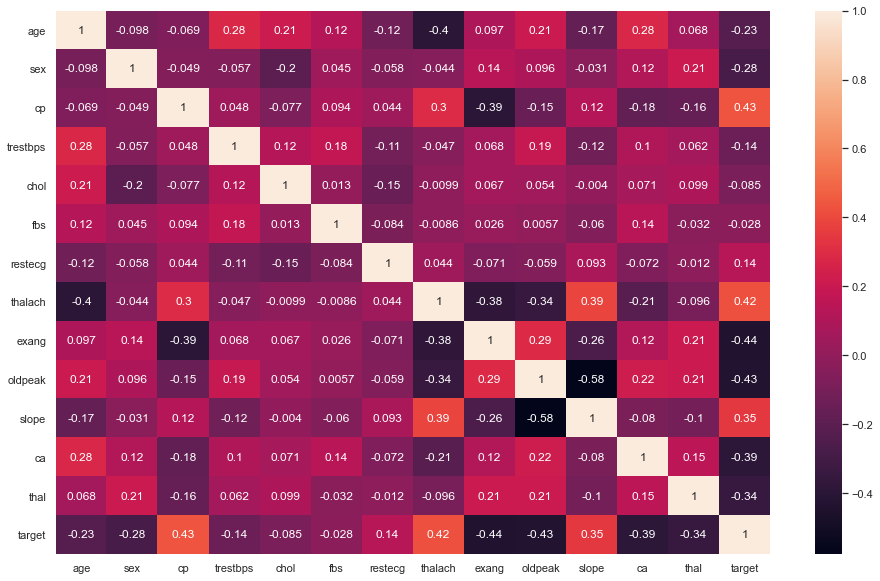

In [7]:
# Visualizing the data correlation
plt.figure(figsize=(16, 10))
sns_plt = sns.heatmap(df.corr(), annot= True)
plt.show()

<AxesSubplot:xlabel='oldpeak', ylabel='slope'>

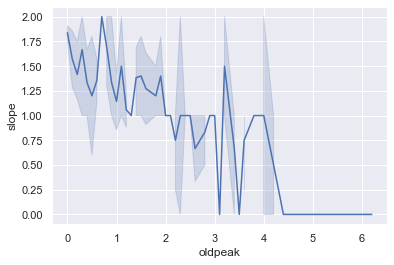

In [8]:
# Highest correlation is between oldpeak and slop
sns.lineplot(x='oldpeak', y='slope', data= df)

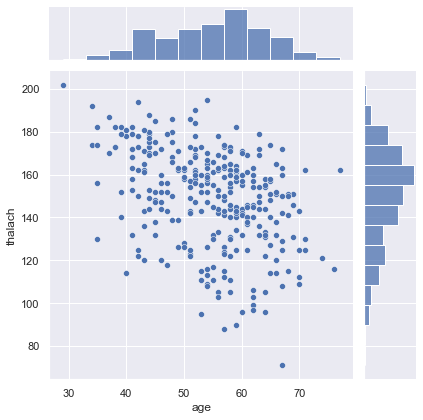

In [11]:
sns.jointplot(x='age', y='thalach', data= df)

<AxesSubplot:xlabel='sex', ylabel='count'>

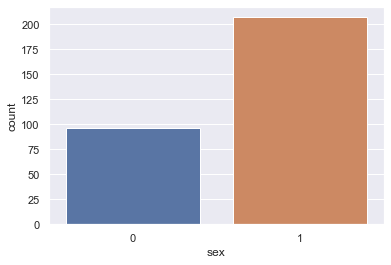

In [12]:
sns.countplot(x= 'sex', data= df)

<AxesSubplot:xlabel='target', ylabel='count'>

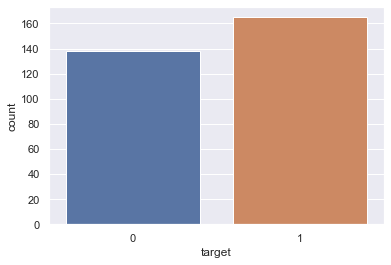

In [13]:
sns.countplot(x= 'target', data= df)

<AxesSubplot:xlabel='sex', ylabel='target'>

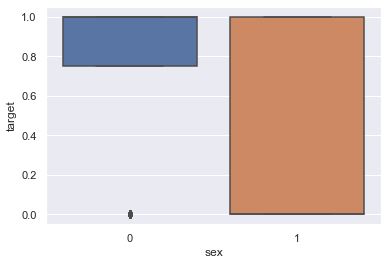

In [15]:
sns.boxplot(x= 'sex', y= 'target', data= df)

## PCA for finding the important features

In [16]:
feat = df.drop(['target'], 1)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
pca.fit(feat.values)
feats = pca.transform(feat.values)

In [25]:
feats

array([[-1.22673448e+01,  2.87383781e+00,  1.49698788e+01, ...,
         2.66465196e+00,  2.68713276e-01,  1.08470418e+00],
       [ 2.69013712e+00, -3.98713736e+01,  8.77882303e-01, ...,
         2.46049742e+00, -2.07808394e-01,  5.19390182e-01],
       [-4.29502141e+01, -2.36368199e+01,  1.75944589e+00, ...,
         2.96905311e-01, -4.37425294e-01,  5.14732956e-01],
       ...,
       [-5.19638115e+01,  1.33237984e+01,  1.54868436e+01, ...,
        -8.57514417e-02, -1.38045635e-01, -2.36030838e-01],
       [-1.14755981e+02,  3.64351842e+01,  1.27770952e-01, ...,
        -7.44168430e-01, -4.09880488e-01, -7.00096310e-01],
       [-1.03961420e+01, -2.33024008e+01,  2.39130354e+00, ...,
        -5.52898055e-01,  4.54761777e-02,  5.28324540e-01]])

In [26]:
pca.explained_variance_ratio_

array([7.47564199e-01, 1.50370221e-01, 8.45968470e-02, 1.62159604e-02,
       3.84085658e-04, 2.81234229e-04, 2.28993383e-04, 9.98328415e-05])

In [27]:
loadings = pd.DataFrame(pca.components_.T, columns= ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8'], index=feat.columns)
loadings

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
age,0.039461,0.182186,0.125505,0.974046,-0.009427,0.003574,-0.023571,-0.004138
sex,-0.001783,0.000794,-0.001065,-0.004635,0.078311,-0.028163,0.045642,-0.305439
cp,-0.001537,-0.012542,0.006163,0.009262,-0.333646,0.700831,0.597896,-0.127720
trestbps,0.047588,0.103810,0.982278,-0.148034,-0.009790,-0.007579,-0.001796,0.000221
chol,0.998053,-0.019425,-0.050865,-0.030251,-0.001344,0.001328,0.001068,0.000249
fbs,0.000116,0.000462,0.003665,0.003434,-0.001464,-0.001391,0.068363,0.021038
restecg,-0.001552,-0.001202,-0.002710,-0.002959,-0.026307,0.014579,-0.003693,-0.027738
thalach,-0.007358,-0.977189,0.128926,0.166484,0.024082,-0.003089,-0.008278,0.001299
exang,0.000631,0.007548,-0.000029,-0.007024,0.111906,-0.071272,-0.117417,-0.119449
oldpeak,0.001330,0.017941,0.009214,-0.000803,0.782758,0.502053,-0.115626,0.098198


## Data Preprocessing

In [28]:
# Eleminating the coulums with the lowest weight at PC1
X = df.drop(['fbs', 'exang', 'slope', 'target'], 1)
y = df['target']

In [29]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[ 1.69716475,  0.69617712, -0.92274852,  0.77251645, -1.36354075,
         0.90163913, -1.07375268,  1.2900049 , -0.70710678,  1.14190596],
       [ 1.02496529,  0.69617712,  1.94013791,  2.23625729, -0.3703119 ,
        -0.97936664,  0.22375805, -0.38883987, -0.70710678,  1.14190596],
       [ 0.46479907,  0.69617712,  1.94013791,  2.23625729,  0.7728383 ,
        -0.97936664,  0.39675948, -0.72460883, -0.70710678,  1.14190596],
       [ 0.57683232,  0.69617712, -0.92274852, -0.39847623,  0.21063328,
        -0.97936664, -0.38174696,  1.45788938,  0.26516504,  1.14190596],
       [ 0.8008988 ,  0.69617712,  0.98584243, -0.10572806, -0.29535123,
         0.90163913, -0.16549517,  0.61846699,  2.20970869,  1.14190596],
       [-0.7675666 ,  0.69617712, -0.92274852, -0.45702586,  0.51047596,
        -0.97936664,  0.69951198, -0.47278211, -0.70710678,  1.14190596],
       [-1.66383254,  0.69617712, -0.92274852, -1.27672073, -1.49472192,
        -0.97936664, -1.54950661,  0.78635147

In [33]:
# Function for the cross validation and GridSearchCV
def set_cross_val(est, X_train, y_train, cv = 10):
    cv = cross_val_score(
        estimator = est,
        X = X_train,
        y = y_train,
        cv = cv
    )
    return cv

def set_grid(est, param, cv = 20):
    cv = GridSearchCV(
        estimator = est,
        param_grid = param,
        cv = cv,
        scoring = "accuracy",
        verbose = 0
    )
    return cv

def print_results(model_cv, X_test_s, y_test):
    return (model_cv.best_score_, model_cv.best_params_, model_cv.score(X_test_s, y_test))

In [53]:
lst = []
lst_lg = ['Logistic Regression']
lst_dt = ['Decision Tree']
lst_rf = ['Random Forest']
lst_gb = ['Gradient Boosting']
lst_kn = ['K-Nearest Neighbours']
lst_sv = ['Support Vector Machine']

## Build a Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lgr = LogisticRegression(random_state = 0)
param_lg = {"C": [0.001, 0.005, 0.01, 0.1, 1, 5]}

lg_cv = set_grid(lgr, param_lg)
lg_cv.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.001, 0.005, 0.01, 0.1, 1, 5]},
             scoring='accuracy')

In [55]:
# Print the best reult fron GridSearchCV
lg_best_score, lg_param, lg_score = print_results(lg_cv, X_test, y_test)
lg_best_score, lg_param, lg_score

(0.8185897435897436, {'C': 0.01}, 0.8688524590163934)

In [56]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
results = set_cross_val(lg_cv, X_train, y_train)
print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 81.08974% (9.90898%)


In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,lg_cv.predict(X_test))
cm

array([[21,  6],
       [ 2, 32]], dtype=int64)

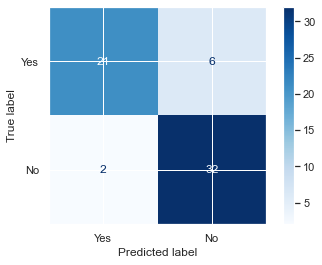

In [58]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(lg_cv, X_test, y_test, 
                            display_labels= ['Yes', 'No'], 
                            cmap = plt.cm.Blues)

In [59]:
from sklearn.metrics import precision_score
lg_prec = precision_score(y_test, lg_cv.predict(X_test))
lg_prec

0.8421052631578947

In [60]:
from sklearn.metrics import recall_score
lg_reca = recall_score(y_test, lg_cv.predict(X_test))
lg_reca

0.9411764705882353

In [61]:
lst_lg.append(lg_score)
lst_lg.append(lg_prec)
lst_lg.append(lg_reca)
lst.append(lst_lg)

## Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0)
param_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6], 'min_samples_leaf': [5, 10, 15, 20, 25, 30]}

dt_cv = set_grid(dtc, param_dt)
dt_cv.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30]},
             scoring='accuracy')

In [73]:
dt_best_score, dt_param, dt_score = print_results(dt_cv, X_test, y_test)
dt_best_score, dt_param, dt_score

(0.8141025641025641,
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 25},
 0.7868852459016393)

In [74]:
results = set_cross_val(dt_cv, X_train, y_train)
print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 80.22436% (9.80219%)


In [75]:
cm = confusion_matrix(y_test, dt_cv.predict(X_test))
cm

array([[22,  5],
       [ 8, 26]], dtype=int64)

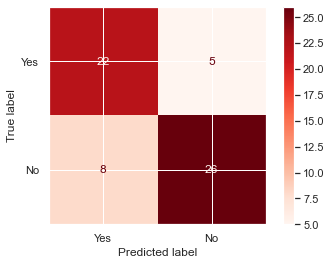

In [76]:
disp = plot_confusion_matrix(dt_cv, X_test, y_test, 
                            display_labels= ['Yes', 'No'], 
                            cmap = plt.cm.Reds)

In [77]:
dt_prec = precision_score(y_test, dt_cv.predict(X_test))
dt_prec

0.8387096774193549

In [78]:
dt_reca = recall_score(y_test, dt_cv.predict(X_test))
dt_reca

0.7647058823529411

In [79]:
lst_dt.append(dt_score)
lst_dt.append(dt_prec)
lst_dt.append(dt_reca)
lst.append(lst_dt)

## Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0)
param_rf = {'n_estimators': [100, 300, 500, 700], 'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [10, 15, 20]}

rf_cv = set_grid(rfc, param_rf)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [10, 15, 20],
                         'n_estimators': [100, 300, 500, 700]},
             scoring='accuracy')

In [87]:
rf_best_score, rf_param, rf_score = print_results(rf_cv, X_test, y_test)
rf_best_score, rf_param, rf_score

(0.8349358974358975,
 {'max_depth': 4, 'min_samples_leaf': 10, 'n_estimators': 500},
 0.8360655737704918)

In [89]:
results = set_cross_val(rf_cv, X_train, y_train)
print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

KeyboardInterrupt: 

In [90]:
cm = confusion_matrix(y_test, rf_cv.predict(X_test))
cm

array([[21,  6],
       [ 4, 30]], dtype=int64)

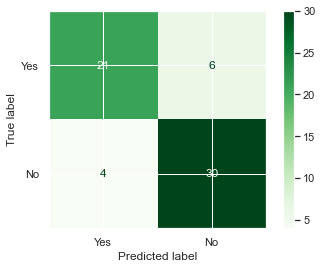

In [91]:
disp = plot_confusion_matrix(rf_cv, X_test, y_test, 
                            display_labels = ['Yes', 'No'], 
                            cmap = plt.cm.Greens)

In [92]:
rf_prec = precision_score(y_test, rf_cv.predict(X_test))
rf_prec

0.8333333333333334

In [93]:
rf_reca = recall_score(y_test, rf_cv.predict(X_test))
rf_reca

0.8823529411764706

In [94]:
lst_rf.append(rf_score)
lst_rf.append(rf_prec)
lst_rf.append(rf_reca)
lst.append(lst_rf)

## Gradient Boosting Classifier

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = 0)
param_gb = {'learning_rate': [0.001, 0.01, 0.1, 1, 5], 'n_estimators': [100, 500 , 1000],
               'max_depth': [3, 5, 7, 10], 'min_samples_leaf': [5,10,15]}

gb_cv = set_grid(gbc, param_gb)
gb_cv.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 5],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [96]:
gb_best_score, gb_param, gb_score = print_results(gb_cv, X_test, y_test)
gb_best_score, gb_param, gb_score

(0.8346153846153845,
 {'learning_rate': 0.001,
  'max_depth': 3,
  'min_samples_leaf': 15,
  'n_estimators': 1000},
 0.8360655737704918)

In [ ]:
results = set_cross_val(gb_cv, X_train, y_train)
print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

In [97]:
cm = confusion_matrix(y_test, gb_cv.predict(X_test))
cm

array([[20,  7],
       [ 3, 31]], dtype=int64)

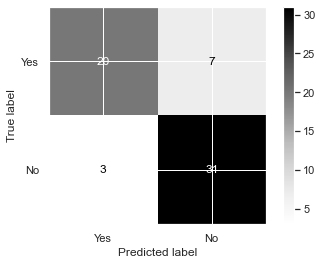

In [99]:
disp = plot_confusion_matrix(gb_cv, X_test, y_test, 
                            display_labels = ['Yes', 'No'], 
                            cmap = plt.cm.Greys)

In [100]:
gb_prec = precision_score(y_test, gb_cv.predict(X_test))
gb_prec

0.8157894736842105

In [101]:
gb_reca = recall_score(y_test, gb_cv.predict(X_test))
gb_reca

0.9117647058823529

In [102]:
lst_gb.append(gb_score)
lst_gb.append(gb_prec)
lst_gb.append(gb_reca)
lst.append(lst_gb)

## K-Nearest Neighbors Classifier

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
param_kn = {"n_neighbors" : range(1, 25)}

kn_cv = set_grid(knc, param_kn)
kn_cv.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 25)}, scoring='accuracy')

In [105]:
kn_best_score, kn_param, kn_score = print_results(kn_cv, X_test, y_test)
kn_best_score, kn_param, kn_score

(0.8269230769230769, {'n_neighbors': 16}, 0.8852459016393442)

In [ ]:
results = set_cross_val(kn_cv, X_train, y_train)
print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

In [106]:
cm = confusion_matrix(y_test, kn_cv.predict(X_test))
cm

array([[23,  4],
       [ 3, 31]], dtype=int64)

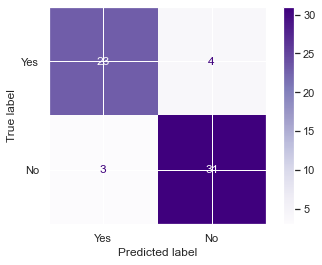

In [107]:
disp = plot_confusion_matrix(kn_cv, X_test, y_test, 
                            display_labels = ['Yes', 'No'], 
                            cmap = plt.cm.Purples)

In [108]:
kn_prec = precision_score(y_test, kn_cv.predict(X_test))
kn_prec

0.8857142857142857

In [109]:
kn_reca = recall_score(y_test, kn_cv.predict(X_test))
kn_reca

0.9117647058823529

In [110]:
lst_kn.append(kn_score)
lst_kn.append(kn_prec)
lst_kn.append(kn_reca)
lst.append(lst_kn)

## Support Vector Machine

In [111]:
# Dividing SVC into two parts for linear and rbf kernels
from sklearn.svm import SVC
# 1- Linear kernel
svc_lin = SVC(kernel = 'linear', random_state = 0)
param_svc_lin = param_cv = {"C": [0.001, 0.01, 1, 3]}

sv_lin_cv = set_grid(svc_lin, param_svc_lin)
sv_lin_cv.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=SVC(kernel='linear', random_state=0),
             param_grid={'C': [0.001, 0.01, 1, 3]}, scoring='accuracy')

In [112]:
sv_lin_best_score, sv_lin_param, sv_lin_score = print_results(sv_lin_cv, X_test, y_test)
sv_lin_best_score, sv_lin_param, sv_lin_score

(0.7980769230769231, {'C': 0.01}, 0.8360655737704918)

In [ ]:
results = set_cross_val(sv_lin_cv, X_train, y_train)
print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

In [113]:
cm = confusion_matrix(y_test, sv_lin_cv.predict(X_test))
cm

array([[20,  7],
       [ 3, 31]], dtype=int64)

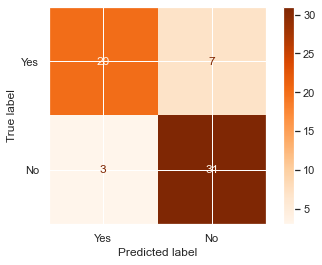

In [114]:
disp = plot_confusion_matrix(sv_lin_cv, X_test, y_test, 
                            display_labels = ['Yes', 'No'], 
                            cmap = plt.cm.Oranges)

In [115]:
sv_lin_prec = precision_score(y_test, sv_lin_cv.predict(X_test))
sv_lin_prec

0.8157894736842105

In [116]:
sv_lin_reca = recall_score(y_test, sv_lin_cv.predict(X_test))
sv_lin_reca

0.9117647058823529

In [134]:
# 2- rbf kernel
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
param_svc_rbf = param_cv = {"C" : [0.001, 0.01, 1, 3, 10, 20, 30], "gamma" : [0.0001, 0.001, 0.01, 0.1, 0.5, 1]}

sv_rbf_cv = set_grid(svc_rbf, param_svc_rbf)
sv_rbf_cv.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=SVC(random_state=0),
             param_grid={'C': [0.001, 0.01, 1, 3, 10, 20, 30],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5, 1]},
             scoring='accuracy')

In [135]:
sv_rbf_best_score, sv_rbf_param, sv_rbf_score = print_results(sv_rbf_cv, X_test, y_test)
sv_rbf_best_score, sv_rbf_param, sv_rbf_score

(0.8147435897435896, {'C': 10, 'gamma': 0.001}, 0.8360655737704918)

In [ ]:
results = set_cross_val(sv_rbf_cv, X_train, y_train)
print("Accuracy: %.5f%% (%.5f%%)" % (results.mean()*100.0, results.std()*100.0))

In [127]:
cm = confusion_matrix(y_test, sv_rbf_cv.predict(X_test))
cm

array([[20,  7],
       [ 3, 31]], dtype=int64)

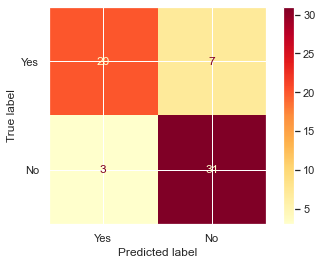

In [168]:
disp = plot_confusion_matrix(sv_rbf_cv, X_test, y_test, 
                            display_labels = ['Yes', 'No'], 
                            cmap = plt.cm.YlOrRd)

In [129]:
sv_rbf_prec = precision_score(y_test, sv_rbf_cv.predict(X_test))
sv_rbf_prec

0.8157894736842105

In [130]:
sv_rbf_reca = recall_score(y_test, sv_rbf_cv.predict(X_test))
sv_rbf_reca

0.9117647058823529

In [131]:
# add the highest score (precision and recall) to the svc list
lst_sv.append(sv_rbf_score)
lst_sv.append(sv_rbf_prec)
lst_sv.append(sv_rbf_reca)
lst.append(lst_sv)

## Voting for the best Classifier

### Selecting the best classifier

In [143]:
# The first way
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('Logistic Regression', LogisticRegression(C = 0.01, random_state = 0)), 
    ('Decision Tree', DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 25, random_state = 0)), 
    ('Random Forest', RandomForestClassifier(n_estimators = 500, max_depth = 4, min_samples_leaf = 10, random_state = 0)), 
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.001, max_depth = 3, min_samples_leaf = 15, random_state = 0)), 
    ('K-Nearest Neighbours', KNeighborsClassifier(n_neighbors = 16)), 
    ('Support Vector Machine', SVC(kernel = 'rbf', C = 10, gamma = 0.001, random_state = 0))
]

vtc = VotingClassifier(classifiers, voting = 'hard')

In [144]:
vtc.fit(X_train, y_train)
vtc.score(X_test, y_test)

0.8360655737704918

In [145]:
cm = confusion_matrix(y_test, vtc.predict(X_test)) 
cm

array([[20,  7],
       [ 3, 31]], dtype=int64)

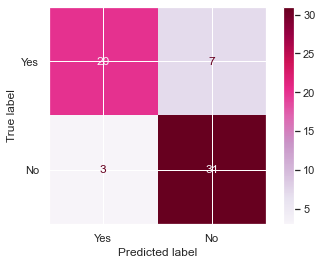

In [167]:
disp = plot_confusion_matrix(vtc, X_test, y_test, 
                            display_labels = ['Yes', 'No'], 
                            cmap = plt.cm.PuRd)

In [153]:
vtc_prec = precision_score(y_test, vtc.predict(X_test))

0.8157894736842105

In [157]:
vtc_reca = recall_score(y_test, vtc.predict(X_test))
vtc_reca

0.9117647058823529

In [136]:
# Another way
lst

[['Logistic Regression',
  0.8688524590163934,
  0.8421052631578947,
  0.9411764705882353],
 ['Decision Tree', 0.7868852459016393, 0.8387096774193549, 0.7647058823529411],
 ['Random Forest', 0.8360655737704918, 0.8333333333333334, 0.8823529411764706],
 ['Gradient Boosting',
  0.8360655737704918,
  0.8157894736842105,
  0.9117647058823529],
 ['K-Nearest Neighbours',
  0.8852459016393442,
  0.8857142857142857,
  0.9117647058823529],
 ['Support Vector Machine',
  0.8360655737704918,
  0.8157894736842105,
  0.9117647058823529]]

In [137]:
df_cls = pd.DataFrame(lst, columns = ['Classifier type', 'Score', 'Precision', 'Recall'])
df_cls

,Classifier type,Score,Precision,Recall
0,Logistic Regression,0.868852,0.842105,0.941176
1,Decision Tree,0.786885,0.838710,0.764706
2,Random Forest,0.836066,0.833333,0.882353
3,Gradient Boosting,0.836066,0.815789,0.911765
4,K-Nearest Neighbours,0.885246,0.885714,0.911765
5,Support Vector Machine,0.836066,0.815789,0.911765


In [138]:
df_cls.iloc[df_cls['Recall'].idxmax()]

Classifier type    Logistic Regression
Score                         0.868852
Precision                     0.842105
Recall                        0.941176
Name: 0, dtype: object

## Saving And Loading Models

In [158]:
import pickle
filename = 'cls_heart.sav'
pickle.dump(vtc, open(filename, 'wb'))

In [160]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8360655737704918
